# Introduction

Unsupervised classification, also referred to an a clustering algorithm, can be useful for a number of application (e.g., data exploration) and scikit-learn provides a large number of algorithms: https://scikit-learn.org/stable/modules/clustering.html.

Let's try and apply some of those algorithms through RSGISLib and using scikit-learn. Please be aware that clustering algorithm can be very time consuming to execute to becareful with the parameters which are being used.


## Running Notebook

The notebook has been run and saved with the outputs so you can see what the outputs should be and so the notebook and be browsed online without having to run the notebook for it to make sense. 

If you are running the notebook for yourself it is recommended that you clear the existing outputs which can be done by running one of the following options depending on what system you are using:

**Jupyter-lab**:

> \> _Edit_ \> _'Clear All Outputs'_

**Jupyter-notebook**:

> \> _Cell_ \> _'All Outputs'_ \> _Clear_




# 1. Import Modules

In [1]:
# Import the matplotlib plotting module and set it to work within
# a notebook environment.
%matplotlib inline
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

# RSGISLib Modules
import rsgislib.classification.clustersklearn
import rsgislib.tools.mapping

# 2. Define the input image files

The input images files are defined:

In [2]:
# Input Sentinel-2 image file with 20 m resolution pixels.
input_img = "../data/sen2_20180629_t30uvd_orb037_osgb_stdsref_20m.tif"

# 3. Apply KMeans Clusterer

Information on KMeans: https://scikit-learn.org/stable/modules/clustering.html#k-means

In [3]:
from sklearn.cluster import MiniBatchKMeans

# Define the number of output classes/clusters as 10.
clusterer = MiniBatchKMeans(batch_size=100, n_clusters=10)

out_cls_img = "sen2_20180629_kmeans_cls.kea"
rsgislib.classification.clustersklearn.img_pixel_sample_cluster(
    input_img,
    out_cls_img,
    gdalformat="KEA",
    no_data_val=0,
    n_img_smpl=100,
    clusterer=clusterer,
    calc_stats=True,
    use_mean_shift_est_band_width=False,
)

Sample input image:


100%|██████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:01<00:00, 144.65it/s]


Fit Clusterer
Fitted Clusterer
Apply to whole image:


100%|███████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:04<00:00, 53.99it/s]


Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.



# 4. Visualise KMeans Result

Note, the assigned colours are random. Try looking at some different areas by editting the `sub_img_bbox` and also open the imagery within Tuiview.

Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250


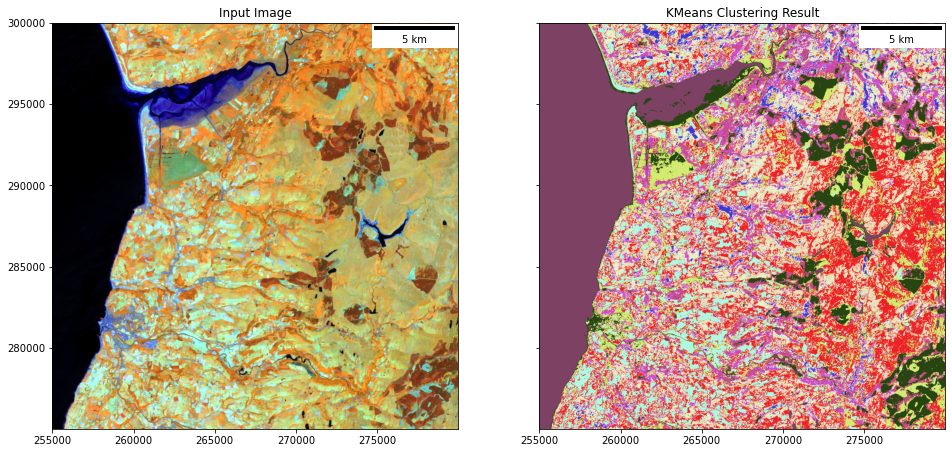

In [4]:
# Define a bbox for the subset to be displayed
#sub_img_bbox = [275000, 300000, 275000, 300000]
sub_img_bbox = [255000, 280000, 275000, 300000]
#sub_img_bbox = [295000, 300000, 295000, 300000]

# Create the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    input_img,
    img_bands=[8, 9, 3],
    img_stch=rsgislib.IMG_STRECTH_CUMULATIVE,
    bbox=sub_img_bbox,
    show_scale_bar = True)
ax1.title.set_text("Input Image")

# Add the classification to the second axis.
rsgislib.tools.mapping.create_thematic_raster_map(ax2, out_cls_img, bbox=sub_img_bbox)
ax2.title.set_text("KMeans Clustering Result")

# 5. Apply Mean-Shift Clusterer

Information on Mean-Shift: https://scikit-learn.org/stable/modules/clustering.html#mean-shift



In [5]:
from sklearn.cluster import MeanShift

clusterer = MeanShift()

out_cls_img = "sen2_20180629_meanshift_cls.kea"
rsgislib.classification.clustersklearn.img_pixel_sample_cluster(
    input_img,
    out_cls_img,
    gdalformat="KEA",
    no_data_val=0,
    n_img_smpl=100,
    clusterer=clusterer,
    calc_stats=True,
    use_mean_shift_est_band_width=True,
)

Sample input image:


100%|██████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:01<00:00, 130.73it/s]


Using Mean-Shift predict bandwidth
Fit Clusterer
Fitted Clusterer
Apply to whole image:


100%|███████████████████████████████████████████████████████████████████████████████████████| 255/255 [00:04<00:00, 54.26it/s]


Get Image Min and Max.

Get Image Histogram.

Adding Histogram and Colour Table to image file
Calculating Image Pyramids.



# 6. Visualise Mean-Shift Result

Note, the assigned colours are random. Try looking at some different areas by editting the `sub_img_bbox` and also open the imagery within Tuiview.

Image Data Size: 1250 x 1250
Image Data Size: 1250 x 1250


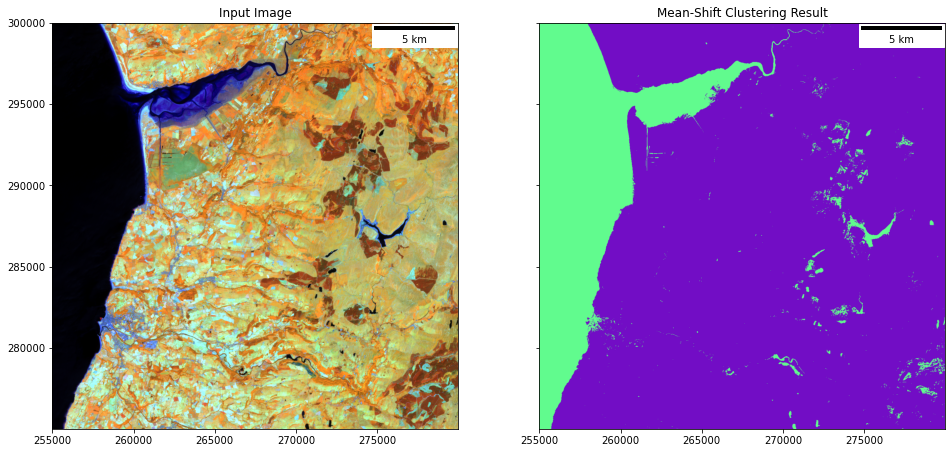

In [6]:
# Define a bbox for the subset to be displayed
#sub_img_bbox = [275000, 300000, 275000, 300000]
sub_img_bbox = [255000, 280000, 275000, 300000]
#sub_img_bbox = [295000, 300000, 295000, 300000]

# Create the matplotlib figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

rsgislib.tools.mapping.create_raster_img_map(
    ax1,
    input_img,
    img_bands=[8, 9, 3],
    img_stch=rsgislib.IMG_STRECTH_CUMULATIVE,
    bbox=sub_img_bbox,
    show_scale_bar = True)
ax1.title.set_text("Input Image")

# Add the classification to the second axis.
rsgislib.tools.mapping.create_thematic_raster_map(ax2, out_cls_img, bbox=sub_img_bbox)
ax2.title.set_text("Mean-Shift Clustering Result")
